<a href="https://colab.research.google.com/github/Python-Is-Long/Teaching/blob/main/Pandas_imputation_by_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020-7-1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import seaborn as sns
%matplotlib inline
from IPython.display import display

#get file from google drive
!pip install googledrivedownloader #black magic
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id="19ufsnrRBQdj2l9m6EVpzBLdf1927RPTb",
                                    dest_path="./train.csv",
                                    unzip=False)

# Load Titanic dataset

In [ ]:
df = pd.read_csv("train.csv")
display(df)
df_original = df.copy()
#check missing values for Age
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


# Impute Age by groups based on Sex, SibSp and Parch

In [ ]:
df_group = df.groupby(["Sex","SibSp","Parch"]).agg("mean")
df_group

PassengerId  Survived    Pclass        Age        Fare
Sex    SibSp Parch                                                        
female 0     0       416.801587  0.785714  2.206349  30.150000   36.016933
             1       525.333333  0.875000  1.875000  27.086957   59.544796
             2       362.050000  0.800000  2.250000  20.705882   33.393120
             3       859.000000  1.000000  3.000000  24.000000   19.258300
             4       568.000000  0.000000  3.000000  29.000000   21.075000
             5       762.500000  0.000000  3.000000  40.000000   34.406250
       1     0       379.619048  0.793651  1.888889  31.806122   48.549935
             1       522.576923  0.769231  2.115385  29.160000   44.147592
             2       494.727273  0.727273  1.727273  21.200000   75.928036
             3       756.000000  0.500000  2.500000  51.000000   28.687500
             4       168.000000  0.000000  3.000000  45.000000   27.900000
             5       318.500000  0.500000  3.000000  38.500000   31.331250
             6       679.000000  0.000000  3.000000  43.000000   46.900000
       2     0       314.000000  0.666667  2.333333  35.500000   30.909733
             1       556.800000  1.000000  2.600000   6.900000   24.754980
             2       410.000000  0.500000  2.000000  17.250000  148.375000
             3       438.000000  1.000000  2.000000  24.000000   18.750000
       3     0       406.500000  1.000000  2.500000  31.500000   18.425000
             1       305.200000  0.000000  3.000000   5.500000   23.710020
             2       427.250000  0.500000  2.000000  14.500000  145.450000
       4     2       387.000000  0.333333  3.000000   8.333333   27.402083
       5     2        72.000000  0.000000  3.000000  16.000000   46.900000
       8     2       612.666667  0.000000  3.000000        NaN   69.550000
male   0     0       470.630170  0.155718  2.459854  32.901316   16.713358
             1       336.214286  0.285714  1.642857  33.530000   97.342864
             2       379.000000  0.555556  1.777778  21.536667   71.616200
       1     0       420.600000  0.233333  2.033333  32.311321   36.373893
             1       500.677419  0.451613  2.322581  25.258621   29.864787
             2       538.000000  0.500000  2.000000  19.417143   65.684900
             3        87.000000  0.000000  3.000000  16.000000   34.375000
             4       400.000000  0.000000  2.000000  52.000000  145.450000
             5        14.000000  0.000000  3.000000  39.000000   31.275000
       2     0       386.923077  0.153846  2.461538  31.181818   43.834615
             1       357.000000  0.500000  2.000000  12.000000   25.250000
       3     1        92.500000  0.000000  3.000000   2.000000   23.270850
             2       304.000000  0.000000  2.333333  11.000000  106.266667
       4     1       361.222222  0.000000  3.000000   6.777778   34.993056
             2       432.000000  0.333333  3.000000   5.333333   31.350000
       5     2       403.000000  0.000000  3.000000   8.750000   46.900000
       8     2       383.500000  0.000000  3.000000        NaN   69.550000

In [ ]:
def ImputeByGroup(x, field, df_group):
  if pd.notnull(x[field]): #if the datum is not missing, just keep the original value
    return x[field]
  else: #if the datum is missing, use the value from the grouped stastitic to impute it
    return df_group.loc[tuple(x[df_group.index.names].values.tolist())][field]

df["Age"] = df.apply(lambda x: ImputeByGroup(x, "Age", df_group), axis=1)
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In the above example, the Age column still has missing data because the groups were divided into too many fine levels. One solution could be to recursively impute further using shallower groups (e.g., impute Age again based on the Sex group only, without SibSp and Parch).

In [ ]:
df_group2 = df.groupby(["Sex"]).agg("mean")
df["Age"] = df.apply(lambda x: ImputeByGroup(x, "Age", df_group2), axis=1)
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
print(df["Age"].isnull().sum())
df[["Age"]]

0


,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,21.2
889,26.0


# An (easier) alternative method to do the same imputation above

In [ ]:
df_1 = df_original.copy()
df_1[df_1["Age"].isnull()]["Age"]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [ ]:
means = df_1.groupby(["Sex","SibSp","Parch"])['Age'].transform("mean") #need to use a series to fill na
means

0      32.311321
1      31.806122
2      30.150000
3      31.806122
4      32.901316
         ...    
886    32.901316
887    30.150000
888    21.200000
889    32.901316
890    32.901316
Name: Age, Length: 891, dtype: float64

In [ ]:
df_1["Age"].fillna(means, inplace=True) #use the series from above to impute the original series. Some NaN values are still there, so further imputing by fewer group conditions is still needed (same with above).
print("Remaining missing values:", df_1["Age"].isnull().sum(), "\n")
df_1["Age"]

Remaining missing values: 7 



0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.2
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

# Check how the statistical properties of the data might have changed after imputation

In [ ]:
display(df_original.groupby(["Sex","SibSp","Parch"])[["Age"]].agg("mean"))
display(df.groupby(["Sex","SibSp","Parch"])[["Age"]].agg("mean"))

Age
Sex    SibSp Parch           
female 0     0      30.150000
             1      27.086957
             2      20.705882
             3      24.000000
             4      29.000000
             5      40.000000
       1     0      31.806122
             1      29.160000
             2      21.200000
             3      51.000000
             4      45.000000
             5      38.500000
             6      43.000000
       2     0      35.500000
             1       6.900000
             2      17.250000
             3      24.000000
       3     0      31.500000
             1       5.500000
             2      14.500000
       4     2       8.333333
       5     2      16.000000
       8     2            NaN
male   0     0      32.901316
             1      33.530000
             2      21.536667
       1     0      32.311321
             1      25.258621
             2      19.417143
             3      16.000000
             4      52.000000
             5      39.000000
       2     0      31.181818
             1      12.000000
       3     1       2.000000
             2      11.000000
       4     1       6.777778
             2       5.333333
       5     2       8.750000
       8     2            NaN

Age
Sex    SibSp Parch           
female 0     0      30.150000
             1      27.086957
             2      20.705882
             3      24.000000
             4      29.000000
             5      40.000000
       1     0      31.806122
             1      29.160000
             2      21.200000
             3      51.000000
             4      45.000000
             5      38.500000
             6      43.000000
       2     0      35.500000
             1       6.900000
             2      17.250000
             3      24.000000
       3     0      31.500000
             1       5.500000
             2      14.500000
       4     2       8.333333
       5     2      16.000000
       8     2            NaN
male   0     0      32.901316
             1      33.530000
             2      21.536667
       1     0      32.311321
             1      25.258621
             2      19.417143
             3      16.000000
             4      52.000000
             5      39.000000
       2     0      31.181818
             1      12.000000
       3     1       2.000000
             2      11.000000
       4     1       6.777778
             2       5.333333
       5     2       8.750000
       8     2            NaN

In [ ]:
display(df_original.groupby(["Sex","SibSp","Parch"])[["Age"]].agg("std"))
display(df.groupby(["Sex","SibSp","Parch"])[["Age"]].agg("std"))

Age
Sex    SibSp Parch           
female 0     0      11.801494
             1      17.898484
             2      11.682063
             3            NaN
             4            NaN
             5       1.414214
       1     0      12.956987
             1      14.752627
             2      15.324635
             3       4.242641
             4            NaN
             5       0.707107
             6            NaN
       2     0      24.748737
             1       9.747756
             2       5.678908
             3            NaN
       3     0       2.121320
             1       3.535534
             2      10.785793
       4     2       5.278889
       5     2            NaN
       8     2            NaN
male   0     0      13.188659
             1      17.926182
             2      20.244557
       1     0      10.062414
             1      20.138980
             2      15.147433
             3            NaN
             4      16.970563
             5            NaN
       2     0      10.600172
             1      15.556349
       3     1            NaN
             2       7.549834
       4     1       5.309844
             2       3.214550
       5     2       5.560276
       8     2            NaN

Age
Sex    SibSp Parch           
female 0     0      10.502666
             1      17.505063
             2      10.720196
             3            NaN
             4            NaN
             5       1.414214
       1     0      11.400628
             1      14.454563
             2      14.538225
             3       4.242641
             4            NaN
             5       0.707107
             6            NaN
       2     0      17.500000
             1       9.747756
             2       5.678908
             3            NaN
       3     0       2.121320
             1       1.767767
             2      10.785793
       4     2       5.278889
       5     2            NaN
       8     2       0.000000
male   0     0      11.337832
             1      17.926182
             2      20.244557
       1     0       9.446651
             1      19.456103
             2      14.023798
             3            NaN
             4      16.970563
             5            NaN
       2     0       9.676588
             1      15.556349
       3     1       0.000000
             2       7.549834
       4     1       5.309844
             2       3.214550
       5     2       5.560276
       8     2       0.000000

In [ ]:
display(df_original.groupby(["Sex","SibSp","Parch"])[["Age"]].agg("median"))
display(df.groupby(["Sex","SibSp","Parch"])[["Age"]].agg("median"))

Age
Sex    SibSp Parch      
female 0     0      28.5
             1      22.0
             2      22.0
             3      24.0
             4      29.0
             5      40.0
       1     0      29.0
             1      31.0
             2      23.0
             3      51.0
             4      45.0
             5      38.5
             6      43.0
       2     0      35.5
             1       4.0
             2      19.5
             3      24.0
       3     0      31.5
             1       5.5
             2      16.0
       4     2       7.5
       5     2      16.0
       8     2       NaN
male   0     0      30.0
             1      36.5
             2      17.0
       1     0      30.0
             1      19.0
             2      25.0
             3      16.0
             4      52.0
             5      39.0
       2     0      28.0
             1      12.0
       3     1       2.0
             2      10.0
       4     1       7.0
             2       4.0
       5     2      10.0
       8     2       NaN

Age
Sex    SibSp Parch           
female 0     0      30.150000
             1      23.500000
             2      20.705882
             3      24.000000
             4      29.000000
             5      40.000000
       1     0      31.806122
             1      31.000000
             2      22.000000
             3      51.000000
             4      45.000000
             5      38.500000
             6      43.000000
       2     0      35.500000
             1       4.000000
             2      19.500000
             3      24.000000
       3     0      31.500000
             1       5.500000
             2      16.000000
       4     2       7.500000
       5     2      16.000000
       8     2      27.995982
male   0     0      32.901316
             1      36.500000
             2      17.000000
       1     0      32.000000
             1      20.000000
             2      22.208571
             3      16.000000
             4      52.000000
             5      39.000000
       2     0      31.181818
             1      12.000000
       3     1       2.000000
             2      10.000000
       4     1       7.000000
             2       4.000000
       5     2      10.000000
       8     2      31.064726

,Age (Before Imputation),Age (After Imputation)
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,21.2
889,26.0,26.0


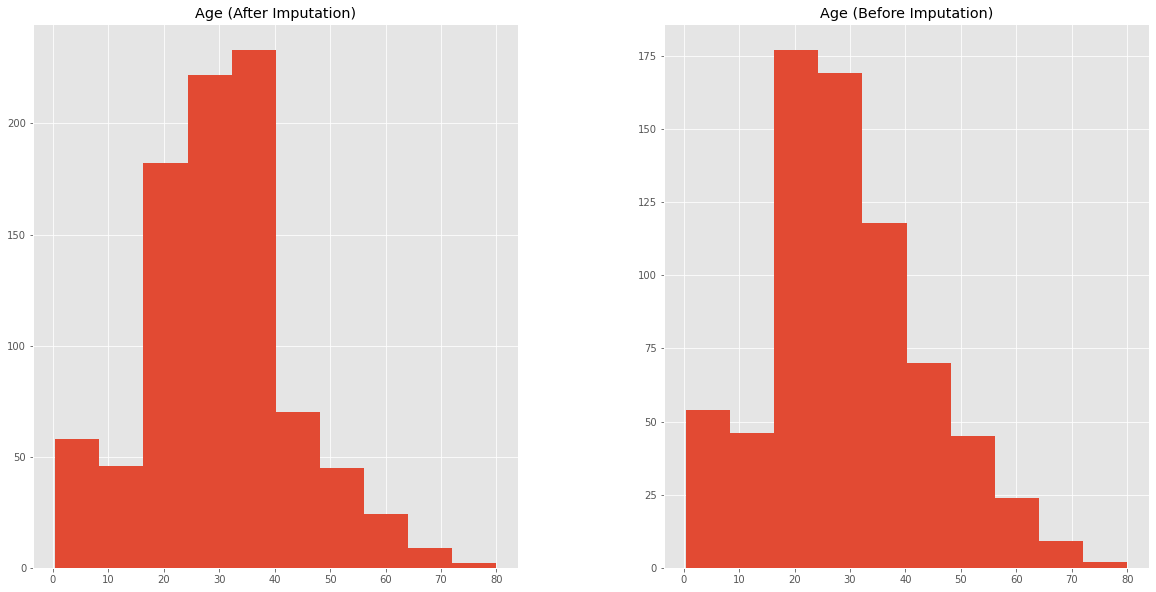

In [ ]:
df_compare = pd.DataFrame({
    "Age (Before Imputation)": df_original["Age"],
    "Age (After Imputation)": df["Age"],
})
display(df_compare)
df_compare.hist(figsize=(20,10))
plt.gcf().set_facecolor("white")

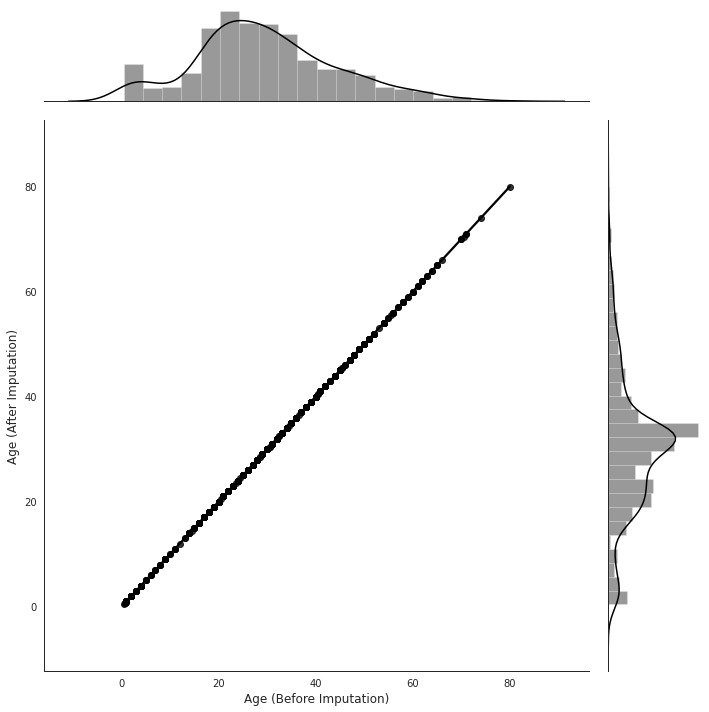

In [ ]:
with sns.axes_style("white"):
  g = sns.jointplot(x="Age (Before Imputation)", y="Age (After Imputation)", data=df_compare, height=10, kind="reg", color="k", dropna=False)

In [ ]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df["Age"], df_original["Age"].dropna())

MannwhitneyuResult(statistic=307134.0, pvalue=0.11753185437665459)

Interpretation of the Mann-Whitney U test's p-value: our way of imputating Age didn't cause a significant change in the statistical distribution of the data.